# Weather project for "Python: Data Analysis" LinkedIn course

Exploring history of weather in Kyiv, using data from station "KIEV, UP", Network:ID "__GHCND:UPM00033345__". Location: Ukrainian Hydrometeorological Institute. The largest set of data: from 1881-01-01 to 2020-07-20.
(Latitude / Longitude: 50.4000° / 30.5331°, Elevation: 166 m)

I'm using open data from Global Historical Climatology Network - (GHCN).

This is data service from the USA National Oceanic and Atmospheric Administration, NOAA / National Centers for Environmental Information, NCEI (former National Climatic Data Center, NCDC)


Besides training tasks from Data Analysis cource (to find and visualize a data for US cities), I'm interested in changing of winter temperatures over the years for Kyiv city, Ukraine, - my home city.

General algorithm:

- find station in list: ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt (or https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt)

- download dataset named "UPM00033345.dly" from ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/ (or https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/)

- parse the file using description in readme.txt https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt from GHCN

- to get overall picture for temperatures over all years

- to process the data - if there are gaps, NANs

- to extract needed parameters - daily TMAX, TMIN and their time references

- to build dependencies of TMAX, TMIN on specified timing

In [150]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [151]:
%matplotlib inline

## How to parse data file

In [13]:
with open('readme.txt','r') as f:
    [print(line) for line in f.readlines()[105:155]]

Each record in a file contains one month of daily data.  The variables on each

line include the following:



------------------------------

Variable   Columns   Type

------------------------------

ID            1-11   Character

YEAR         12-15   Integer

MONTH        16-17   Integer

ELEMENT      18-21   Character

VALUE1       22-26   Integer

MFLAG1       27-27   Character

QFLAG1       28-28   Character

SFLAG1       29-29   Character

VALUE2       30-34   Integer

MFLAG2       35-35   Character

QFLAG2       36-36   Character

SFLAG2       37-37   Character

  .           .          .

  .           .          .

  .           .          .

VALUE31    262-266   Integer

MFLAG31    267-267   Character

QFLAG31    268-268   Character

SFLAG31    269-269   Character

------------------------------



These variables have the following definitions:



ID         is the station identification code.  Please see "ghcnd-stations.txt"

           for a complete list of stations and

## Parsing of datafile using numpy

In [152]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [153]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [154]:
kyiv = parsefile('UPM00033345.dly')

In [155]:
kyiv

array([(1881, 1, 'TMAX',    22,    10,   -21,     1,     6,   -15,   -16,   -11,   -72,   -82,   -40,   -62,  -109,   -66,  -135,  -125,  -115,   -84,  -140,   -60,   -71,  -124,  -109,  -111,  -107,   -86,  -155,  -151,   -65,   -38,   -45),
       (1881, 1, 'TMIN',    -6,   -55,   -72,   -51,   -69,   -51,   -88,   -69,  -144,  -152,  -100,  -116,  -164,  -127,  -197,  -200,  -150,  -154,  -181,  -145,  -136,  -156,  -159,  -177,  -189,  -171,  -202,  -212,  -160,   -71,   -65),
       (1881, 1, 'PRCP',     0,     0,     0,     0,     0,     0,     0,     0,     6,     0,     0,     0,    46,    30,     0,     0,    12,     0,     5,    36,     1,     0,     0,     0,     0,     0,     0,     0,     4,     0,     0),
       ...,
       (2020, 6, 'TMIN', -9999, -9999,    55, -9999, -9999,   143, -9999, -9999,   193, -9999,   204, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2020, 6,

### Extracting temperature observation data

In [156]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [157]:
unroll(kyiv[0])

array([('1881-01-01',   2.2), ('1881-01-02',   1. ),
       ('1881-01-03',  -2.1), ('1881-01-04',   0.1),
       ('1881-01-05',   0.6), ('1881-01-06',  -1.5),
       ('1881-01-07',  -1.6), ('1881-01-08',  -1.1),
       ('1881-01-09',  -7.2), ('1881-01-10',  -8.2),
       ('1881-01-11',  -4. ), ('1881-01-12',  -6.2),
       ('1881-01-13', -10.9), ('1881-01-14',  -6.6),
       ('1881-01-15', -13.5), ('1881-01-16', -12.5),
       ('1881-01-17', -11.5), ('1881-01-18',  -8.4),
       ('1881-01-19', -14. ), ('1881-01-20',  -6. ),
       ('1881-01-21',  -7.1), ('1881-01-22', -12.4),
       ('1881-01-23', -10.9), ('1881-01-24', -11.1),
       ('1881-01-25', -10.7), ('1881-01-26',  -8.6),
       ('1881-01-27', -15.5), ('1881-01-28', -15.1),
       ('1881-01-29',  -6.5), ('1881-01-30',  -3.8),
       ('1881-01-31',  -4.5)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [158]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [159]:
kyiv_tmax = getobs('UPM00033345.dly','TMAX')
kyiv_tmin = getobs('UPM00033345.dly','TMIN')
print(len(kyiv_tmax))
np.savetxt('kyiv_tmax.txt', kyiv_tmax, fmt='%s')
kyiv_tmax

50524


array([('1881-01-01',  2.2), ('1881-01-02',  1. ), ('1881-01-03', -2.1),
       ..., ('2020-06-28',  nan), ('2020-06-29',  nan),
       ('2020-06-30',  nan)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

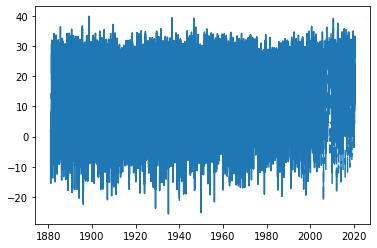

In [160]:
pp.plot(kyiv_tmax['date'],kyiv_tmax['value'])
#pp.plot(kyiv_tmin['date'],kyiv_tmin['value'])
#46000:47524

In [161]:
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    
    pp.plot(t['date'],smoothed)

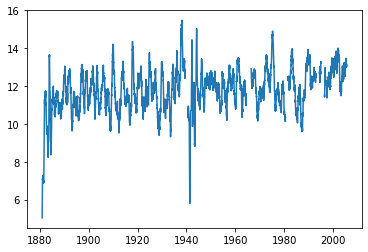

In [162]:
plot_smoothed(kyiv_tmax,365)

### Data processing: filling of NANs

In [163]:
def fillnans(data):
    data1 = data.copy()
    dates_float = data1['date'].astype(np.float64)
    
    nan = np.isnan(data1['value'])
    
    data1['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data1['value'][~nan])
    return data1

In [164]:
kyiv_tmax_filled = fillnans(kyiv_tmax)
kyiv_tmin_filled = fillnans(kyiv_tmin)
np.savetxt('kyiv_tmax_filled.txt', kyiv_tmax_filled, fmt='%s')

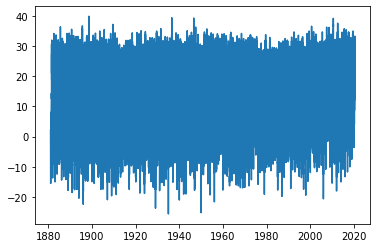

In [165]:
pp.plot(kyiv_tmax_filled['date'],kyiv_tmax_filled['value'])

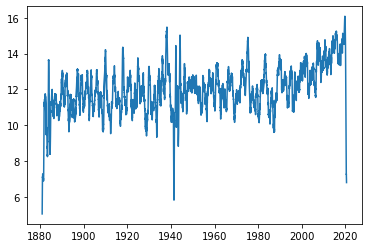

In [166]:
plot_smoothed(kyiv_tmax_filled,365)

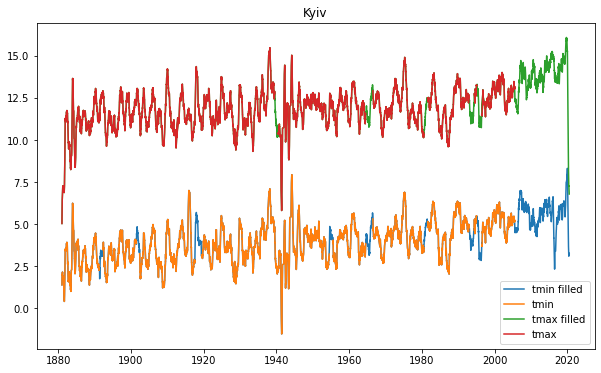

In [167]:
pp.figure(figsize=(10,6))
plot_smoothed(kyiv_tmin_filled,365)
plot_smoothed(kyiv_tmin,365)
plot_smoothed(kyiv_tmax_filled,365)
plot_smoothed(kyiv_tmax,365)
pp.legend(['tmin filled','tmin','tmax filled','tmax',])
pp.title('Kyiv')
pp.show()

### Extracting yearly information

In [168]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [169]:
max80 = selectyear(kyiv_tmax_filled, 1980)
min80 = selectyear(kyiv_tmin_filled, 1980)
min80

array([ -2.9,  -3.1,  -4.7,  -2.1,  -1.8,  -4.4,  -4.8, -10.7, -12.1,
       -13.4, -13.9, -12.9, -13.6,  -8.9, -12.8, -10.4, -12.5, -16. ,
       -14. , -10.1, -10.6, -15.3, -15.6, -11.6,  -1.6,  -2.7, -11.5,
       -14. , -17.4, -18.1,  -9.7,   2.8,  -3.3,  -7.1,  -6.4,  -2.1,
         0.3,   0.4,   0.4,  -0.1,  -6.1,  -5.1,  -9.1, -14.7, -15. ,
       -13.3, -13.6, -13.4, -10. ,  -9.4, -10.2,  -7.8,  -3.6,  -4. ,
        -6.6,  -7.1,  -6.3,  -7.1,  -8.6, -11.2, -10.3,  -9.3,  -3.9,
        -6.6,  -9.1,  -9.4,  -7. ,  -3.8,  -6. ,  -2.6,  -4.6,  -9.7,
       -11.1,  -9.3,  -9.7,  -8.8,  -6.3,  -7. , -10.3, -11.2,  -7.9,
        -8.1,  -9.7,  -9.8,  -6.1,  -3.2,  -1.1,  -4.4,   0.3,  -2.1,
         0.6,   0.1,   2.5,   3.4,   2.9,   1.5,   1.9,   1.7,   0. ,
        -0.1,   0.5,   2.7,   0.2,   0.5,   3.2,   1.3,  -0.7,   1.9,
         0.3,   4.5,   4.4,   4.7,   7.7,  10. ,   8.9,   5.3,   6.9,
         8.7,   8.8,   7. ,  10.5,  11.6,  11.5,   3.6,   2.2,   3.5,
         5.4,   7.7,

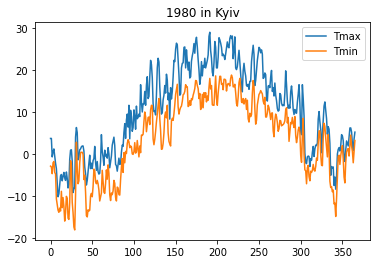

In [170]:
pp.plot(max80)
pp.plot(min80)
pp.title('1980 in Kyiv')
pp.legend(['Tmax','Tmin'])
pp.show()

In [171]:
kyiv_tmin_all = np.vstack([selectyear(kyiv_tmin_filled,year)[:365] for year in range(1950,2014)])
kyiv_tmax_all = np.vstack([selectyear(kyiv_tmax_filled,year)[:365] for year in range(1950,2014)])

In [172]:
kyiv_tmin_recordmin = np.min(kyiv_tmin_all,axis=0)
kyiv_tmin_recordmax = np.max(kyiv_tmin_all,axis=0)

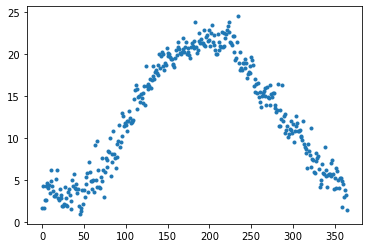

In [173]:
pp.plot(kyiv_tmin_recordmax,'.')

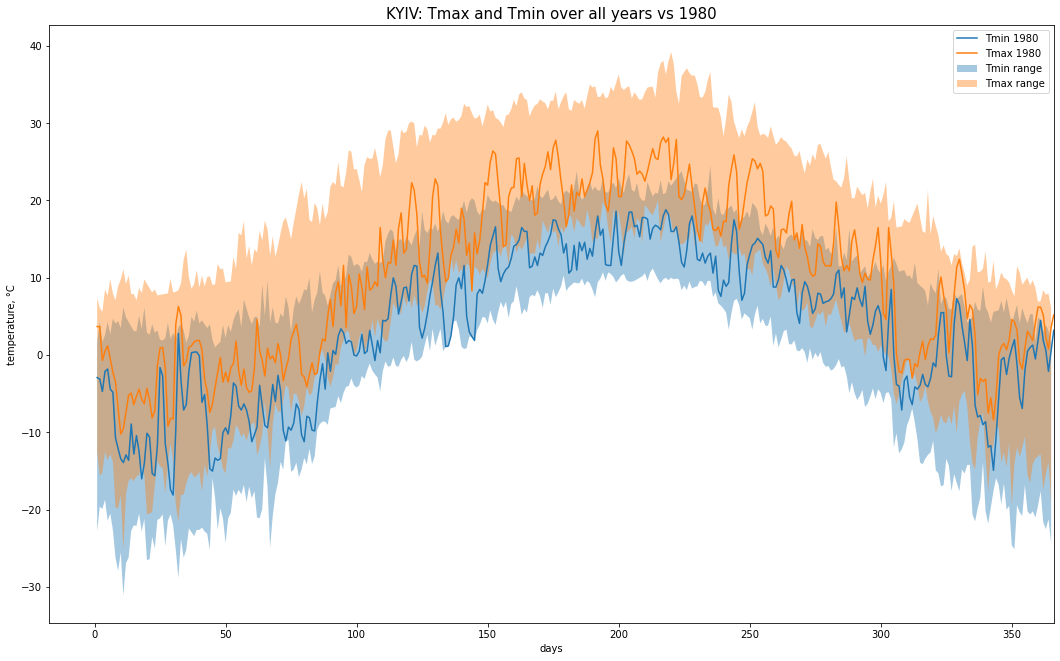

In [189]:
pp.figure(figsize=(18,11))

days = np.arange(1,366)
days1 = np.arange(1,367)
pp.fill_between(days,np.min(kyiv_tmin_all,axis=0),np.max(kyiv_tmin_all,axis=0),alpha=0.4)
pp.fill_between(days,np.min(kyiv_tmax_all,axis=0),np.max(kyiv_tmax_all,axis=0),alpha=0.4)

pp.plot(days1, selectyear(kyiv_tmin_filled,1980))
pp.plot(days1, selectyear(kyiv_tmax_filled,1980))

pp.axis(xmax=366)
pp.xlabel('days')
pp.ylabel('temperature, °C')
pp.title('KYIV: Tmax and Tmin over all years vs 1980', fontsize=15)
pp.legend(['Tmin 1980','Tmax 1980','Tmin range','Tmax range'])
pp.show()

In [180]:
[print(year, len(selectyear(kyiv_tmin_filled, year))) for year in range(1940,2021)]

1940 366
1941 243
1942 365
1943 243
1944 366
1945 365
1946 334
1947 365
1948 366
1949 365
1950 365
1951 365
1952 366
1953 365
1954 365
1955 365
1956 366
1957 365
1958 365
1959 365
1960 366
1961 365
1962 365
1963 365
1964 366
1965 365
1966 365
1967 365
1968 366
1969 365
1970 365
1971 365
1972 366
1973 365
1974 365
1975 365
1976 366
1977 365
1978 365
1979 365
1980 366
1981 365
1982 365
1983 365
1984 366
1985 365
1986 365
1987 365
1988 366
1989 365
1990 365
1991 365
1992 366
1993 365
1994 365
1995 365
1996 366
1997 365
1998 365
1999 365
2000 366
2001 365
2002 365
2003 365
2004 366
2005 365
2006 365
2007 365
2008 366
2009 365
2010 365
2011 365
2012 366
2013 365
2014 365
2015 335
2016 305
2017 365
2018 365
2019 335
2020 182


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [186]:
aaaa=selectyear(kyiv_tmin_filled, 2019)
display(aaaa)

array([ -2.9       ,  -3.45      ,  -4.        ,  -4.55      ,
        -5.1       ,  -5.3       ,  -8.33333333, -11.36666667,
       -14.4       , -11.        ,  -8.53333333,  -6.06666667,
        -3.6       ,  -4.14      ,  -4.68      ,  -5.22      ,
        -5.76      ,  -6.3       ,  -6.84      ,  -7.38      ,
        -7.92      ,  -8.46      ,  -9.        , -11.35      ,
       -13.7       ,  -9.5       ,  -9.8       , -10.1       ,
        -5.6       ,  -3.7       ,  -1.8       ,   0.1       ,
        -0.05      ,  -0.2       ,   2.        ,   0.9       ,
        -0.2       ,  -1.3       ,  -2.4       ,  -3.5       ,
        -4.4       ,  -4.5       ,  -3.15      ,  -1.8       ,
        -1.1       ,   0.        ,  -0.9625    ,  -1.925     ,
        -2.8875    ,  -3.85      ,  -4.8125    ,  -5.775     ,
        -6.7375    ,  -7.7       ,  -6.73333333,  -5.76666667,
        -4.8       ,  -3.83333333,  -2.86666667,  -1.9       ,
        -0.93333333,   0.03333333,   1.        ,   1.9 